

---



---

# Logistic Regression


---



---
# Logistic Regression

Logistic Regression is a linear model used for binary classification. Despite its name, it's primarily used for classification rather than regression tasks. It calculates the probability that a given input belongs to a certain class using the logistic function, also known as the sigmoid function.

The logistic function is defined as:

$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$

Where \( t \) is the linear function of the input features:

$$
t = \theta^T \cdot x
$$

Here, theta represents the model's parameters (including the bias term), and \( x \) represents the input features.

The logistic regression model predicts the probability of the positive class (class 1) as:

$$
\hat{p} = \sigma(\theta^T \cdot x)
$$

Finally, it makes predictions based on this probability:

$$
\hat{y} = \begin{cases} 0 & \text{if } \hat{p} < 0.5 \\ 1 & \text{if } \hat{p} \geq 0.5 \end{cases}
$$

logistic regression calculates the weighted sum of the input features and applies the logistic function to predict the probability of belonging to the positive class.





In this notebook, we will explore the application of logistic regression using the Iris dataset.



##Decision Boundaries

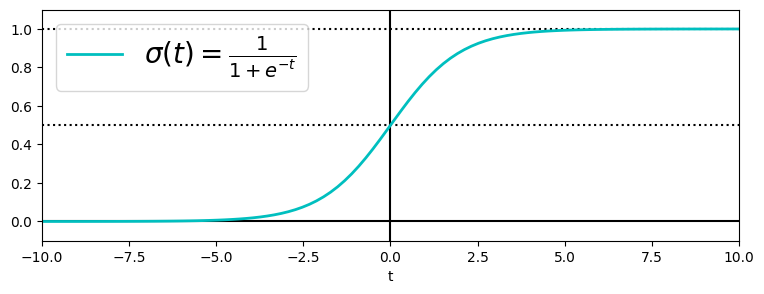

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for t
t = np.linspace(-10, 10, 100)

# Calculate the sigmoid function
sig = 1 / (1 + np.exp(-t))

# Plot the sigmoid function
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "c-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()


##Import the datasets

In [3]:
# Import the datasets module from scikit-learn
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Print the keys of the dataset dictionary
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
# Print the description of the Iris dataset
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
# Extracting the petal width feature (column index 3) from the Iris dataset for the input features (X)
X = iris["data"][:, 3:]

# Creating the target labels (y) where 1 indicates Iris virginica and 0 indicates other species
y = (iris["target"] == 2).astype(int)



# Setup the model

`LogisticRegression` is a popular machine learning algorithm for binary classification tasks. Ay its core its a simple linear regression wrapped inside a logistic function with a slightly modified cost function. It uses the `solver` attribute to specify the algorithm used for optimization, such as 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.


For comprehensive information, refer to the [LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [9]:
from sklearn.linear_model import LogisticRegression

# Assuming X and y are defined
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)


LogisticRegression(random_state=42)

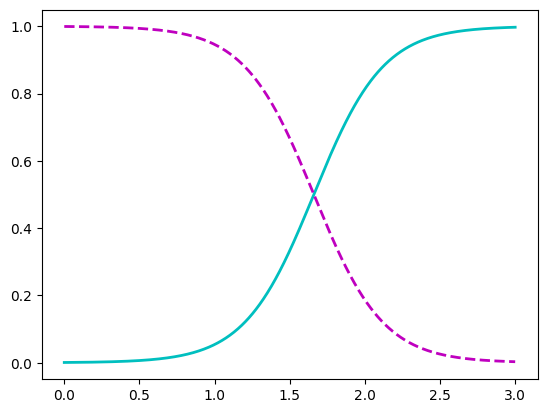

In [10]:
# Generate new data points for petal width
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Predict the probabilities for each class
y_proba = log_reg.predict_proba(X_new)

# Plot the predicted probabilities
plt.plot(X_new, y_proba[:, 1], "c-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "m--", linewidth=2, label="Not Iris virginica")




In [11]:
def draw_decision_boundary(thershold, X_new, y_proba):
    # Find the decision boundary where the probability of being Iris virginica is 0.5
    decision_boundary = X_new[y_proba[:, 1] >= thershold][0]

    # Plot the data points and decision boundary
    plt.figure(figsize=(8, 3))
    plt.plot(X[y==0], y[y==0], "cs", label="Not Iris virginica")
    plt.plot(X[y==1], y[y==1], "m^", label="Iris virginica")
    plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
    plt.xlabel("Petal width (cm)", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.legend(loc="center left", fontsize=14)

    # Plot the predicted probabilities
    plt.plot(X_new, y_proba[:, 1], "m-", linewidth=2, label="Iris virginica")
    plt.plot(X_new, y_proba[:, 0], "c--", linewidth=2, label="Not Iris virginica")

    # Add text and arrows for clarity
    plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
    plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='c', ec='c')
    plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='m', ec='m')
    # Set axis limits and save the figure
    plt.axis([0, 3, -0.02, 1.02])
    plt.show()
    return decision_boundary

**Decision Boundary Graphs: A Visual Guide to Classification Algorithms**

Decision boundary graphs serve as visual guides, delineating how classification algorithms partition various classes within the feature space. These visualizations are instrumental in comprehending a model's classification strategy and its efficacy in distinguishing among classes based on extracted patterns. The process of plotting these boundaries offers a lens through which one can evaluate a model's complexity, its generalization capabilities, and identify potential issues of underfitting or overfitting.

**Generating and Adjusting Decision Boundaries:**

To visualize and modify decision boundaries, adjusting the model's hyperparameters is a common practice. This fine-tuning allows for observation of how alterations affect the demarcation between classes, thus playing a pivotal role in model evaluation and enhancement. Such adjustments shed light on the model's adaptability and performance variance across the feature space's different segments.

**The Role of Threshold Adjustment:**

Threshold adjustment modifies the decision criterion for classifying instances, affecting:
- **Model Sensitivity:** Lowering the threshold increases sensitivity, capturing more positive instances but risking more false positives.
- **Model Specificity:** Raising the threshold enhances specificity, reducing false positives but possibly missing true positives.


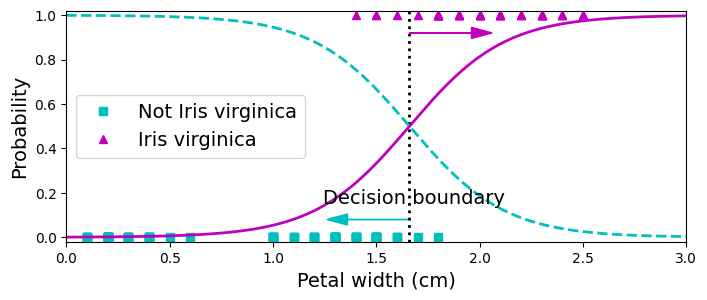

In [12]:
# Generate new data points for petal width
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Predict the probabilities for each class
y_proba = log_reg.predict_proba(X_new)
decision_boundary = draw_decision_boundary(0.50, X_new, y_proba)


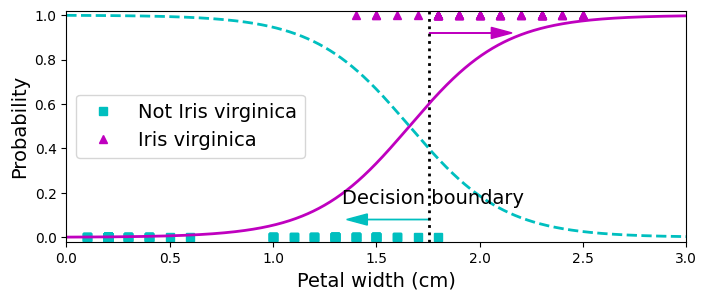

array([1.75675676])

In [13]:
draw_decision_boundary(0.60, X_new, y_proba)

In [14]:
decision_boundary

array([1.66066066])

In [ ]:
# Predict class probabilities for new samples with petal width values of 1.7 and 1.5
log_reg.predict([[1.7], [1.5]])

array([1, 0])